Modeling and Simulation (CS-302)

Lab: 9 Cellular Automata Heat Diffusion

Authors: Rushi Rajpara (201801410), Ayan Khokhar (201801057)


**Assumptions**

 We apply heat and cold through the thickness of the bar and assume that each internal point on a line perpendicular to the top surface of the bar has the same temperature. If a point on the top surface has temperature 25 °C, then every point directly below that location is at 25 °C. 

Moreover, we assume that the bar is in a still room and that the immediate surroundings are at the same temperatures as the bar. 

Temperature diffuses within the bar, but external conditions do not affect the temperatures.

Thus, we model the bar in two dimensions, length and width, considering the bar as rectangular matrix with m*n grid. 





In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
import copy
from math import *
import matplotlib.animation as animation
from IPython.display import HTML
mpl.rc('animation', html='html5')
#value of cold temp, hot temp, ambient temp (keep COLD < AMBIENT < HOT)
COLD = 0
AMB = 25
HOT = 50

#m is number of rows, n is number of columns
m = 10
n = 30

# location of hot and cold sites 
HotSites = [[4,0],[5,0],[6,0],[0,21]]
ColdSites = [[9,8],[9,9],[9,10]]

In [3]:
#Helper Functions
def applyHotCold(rod, HotSites,ColdSites):
    for x in HotSites:
        rod[x[0]][x[1]] = HOT
    for x in ColdSites:
        rod[x[0]][x[1]] = COLD
    return rod

def initBar(m,n,HotSites,ColdSites):
    rod = [[AMB for i in range(n)] for j in range(m)]
    return applyHotCold(rod, HotSites, ColdSites)


def apply_boundry_reflecting(rod):
    tmp_rod = [[0 for k in range(0,n+2)] for kk in range(0,m+2)]
    for i in range(1,m+1):
        for j in range(1,n+1):
            tmp_rod[i][j] = rod[i-1][j-1];
    for i in range(1,n+1):
        tmp_rod[0][i] = tmp_rod[1][i];
        tmp_rod[m+1][i] = tmp_rod[m][i];
    for i in range(1,m+1):
        tmp_rod[i][0] = tmp_rod[i][1];
        tmp_rod[i][n+1] = tmp_rod[i][n];

    tmp_rod[0][0] = tmp_rod[1][1];
    tmp_rod[m+1][n+1] = tmp_rod[m][n];
    tmp_rod[m+1][0] = tmp_rod[m][1];
    tmp_rod[0][n+1] = tmp_rod[1][n];
    return tmp_rod

def apply_boundry_absorb(rod,val):
    tmp_rod = [[0 for k in range(0,n+2)] for kk in range(0,m+2)]
    for i in range(1,m+1):
        for j in range(1,n+1):
            tmp_rod[i][j] = rod[i-1][j-1];
    for i in range(1,n+1):
        tmp_rod[0][i] = val;
        tmp_rod[m+1][i] = val;
    for i in range(1,m+1):
        tmp_rod[i][0] = val;
        tmp_rod[i][n+1] = val;

    tmp_rod[0][0] = val;
    tmp_rod[m+1][n+1] = val;
    tmp_rod[m+1][0] = val;
    tmp_rod[0][n+1] = val;
    return tmp_rod

def apply_boundry_periodic(rod):
    tmp_rod = [[0 for k in range(0,n+2)] for kk in range(0,m+2)]
    for i in range(1,m+1):
        for j in range(1,n+1):
            tmp_rod[i][j] = rod[i-1][j-1];
    for i in range(1,n+1):
        tmp_rod[0][i] = tmp_rod[m][i];
        tmp_rod[m+1][i] = tmp_rod[1][i];
    for i in range(1,m+1):
        tmp_rod[i][0] = tmp_rod[i][n];
        tmp_rod[i][n+1] = tmp_rod[i][1];

    tmp_rod[0][0] = tmp_rod[m][0];
    tmp_rod[m+1][n+1] = tmp_rod[1][n+1];
    tmp_rod[m+1][0] = tmp_rod[m][n];
    tmp_rod[0][n+1] = tmp_rod[0][1];
    return tmp_rod

def do_diffusion(rod,diffrate=0.02,opt=1,val=20):
    rod2 = copy.deepcopy(rod)
    if(opt == 1):
        tmp_rod = apply_boundry_reflecting(rod2)  
    elif(opt == 2):
        tmp_rod = apply_boundry_absorb(rod2,val)
    elif(opt == 3):
        tmp_rod = apply_boundry_periodic(rod2)
    for i in range(1,m+1):
        for j in range(1,n+1):
            rod2[i-1][j-1] = (1 - 8*diffrate)*tmp_rod[i][j] + diffrate*(tmp_rod[i-1][j] + tmp_rod[i+1][j] + tmp_rod[i][j-1] + tmp_rod[i][j+1] + tmp_rod[i-1][j-1] + tmp_rod[i-1][j+1] + tmp_rod[i+1][j-1] + tmp_rod[i+1][j+1]);
    return rod2;

#For Question 3
def do_diffusion_q3(rod,opt=1,val=20):
    rod2 = copy.deepcopy(rod)
    if(opt == 1):
        tmp_rod = apply_boundry_reflecting(rod2)  
    elif(opt == 2):
        tmp_rod = apply_boundry_absorb(rod2,val)
    elif(opt == 3):
        tmp_rod = apply_boundry_periodic(rod2)
    for i in range(1,m+1):
        for j in range(1,n+1):
            rod2[i-1][j-1] = 0.25*tmp_rod[i][j] + 0.125*(tmp_rod[i-1][j] + tmp_rod[i+1][j] + tmp_rod[i][j-1] + tmp_rod[i][j+1]) + 0.0625*(tmp_rod[i-1][j-1] + tmp_rod[i-1][j+1] + tmp_rod[i+1][j-1] + tmp_rod[i+1][j+1]);
    return rod2;

#For Question 9
def do_diffusion_random(rod,diffrate=0.02,opt=1,val=20):
    rod2 = copy.deepcopy(rod)
    if(opt == 1):
        tmp_rod = apply_boundry_reflecting(rod2)  
    elif(opt == 2):
        tmp_rod = apply_boundry_absorb(rod2,val)
    elif(opt == 3):
        tmp_rod = apply_boundry_periodic(rod2)

    rnd = np.random.normal(0,0.5,8)
    su = 0;
    # print(rnd)

    for i in range(len(rnd)):
        rnd[i] = (1 + rnd[i])*diffrate

    for x in rnd:
        su += x;
    for i in range(len(rnd)):
        rnd[i] = rnd[i]/su

    for i in range(1,m+1):
        for j in range(1,n+1):
            rod2[i-1][j-1] = rnd[0]*tmp_rod[i-1][j] + rnd[1]*tmp_rod[i+1][j] + rnd[2]*tmp_rod[i][j-1] + rnd[3]*tmp_rod[i][j+1] + rnd[4]*tmp_rod[i-1][j-1] + rnd[5]*tmp_rod[i-1][j+1] + rnd[6]*tmp_rod[i+1][j-1] + rnd[7]*tmp_rod[i+1][j+1];
    return rod2;

#For making videos
def animate_video(grids, name):  
  Writer = animation.writers['ffmpeg']
  writer = Writer(fps=1, metadata=dict(artist='Me'), bitrate=1800)

  fig1 = plt.figure(1)
  plt.axis('off')
  
  gridplots = plt.imshow(grids[0][:][:], cmap='gray', interpolation='nearest', animated=True)

  def updateGrid(i, *args):
        gridplots.set_array(grids[i][:][:])
        return gridplots,

  grid_animation = animation.FuncAnimation(fig1, updateGrid, save_count = len(grids), 
                                    interval=50, blit=False)
  

  grid_animation.save(name, writer=writer)
  HTML(grid_animation.to_html5_video())
  plt.close(1)


In [4]:
#Question 1(a), stopping if difference is less than 0.001 for every cell
rodarr = [[[0 for k in range(n)] for j in range(m)] for i in range(1)]
rodarr[0] = initBar(m,n,HotSites,ColdSites)
itr_cnt = 0
t = 1
while(1):
    itr_cnt += 1
    tmp = do_diffusion(rodarr[t-1],diffrate = 0.01,opt = 1)
    rodarr.append(tmp)
    max_diff = 0
    for i in range(len(rodarr[0])):
        for j in range(len(rodarr[0][0])):
            tmp = abs(rodarr[t][i][j] - rodarr[t-1][i][j])
            max_diff = max(max_diff,tmp)
    if(max_diff < 0.001):
        break;
    t+=1


animate_video(rodarr, 'Q1(a).mp4')

print('Temperature at Equilibrium = ', rodarr[t-1][0][0])
print('Number of Iterations Done = ', itr_cnt)


#Question 1(b), stopping if difference is less than 0.001 for every cell, applying heat for first 10 steps
rodarr = [[[0 for k in range(n)] for j in range(m)] for i in range(1)]
rodarr[0] = initBar(m,n,HotSites,ColdSites)
itr_cnt = 0
t = 1
while(1):
    if(itr_cnt <= 10):
        applyHotCold(rodarr[t-1],HotSites,ColdSites)
    itr_cnt += 1
    tmp = do_diffusion(rodarr[t-1],diffrate = 0.01,opt = 1)
    rodarr.append(tmp)
    max_diff = 0
    for i in range(len(rodarr[0])):
        for j in range(len(rodarr[0][0])):
            tmp = abs(rodarr[t][i][j] - rodarr[t-1][i][j])
            max_diff = max(max_diff,tmp)
    if(max_diff < 0.001):
        break;
    t += 1

animate_video(rodarr, 'Q1(b).mp4')

  
print('Temperature at Equilibrium = ', rodarr[t-1][0][0])
print('Number of Iterations Done = ', itr_cnt)

Temperature at Equilibrium =  25.63450494854775
Number of Iterations Done =  713
Temperature at Equilibrium =  25.756188117921667
Number of Iterations Done =  832


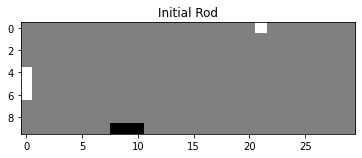

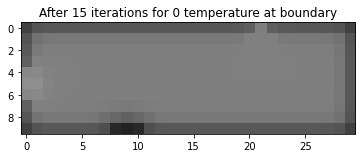

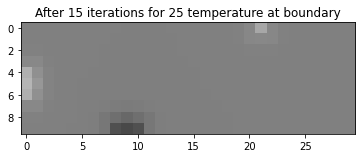

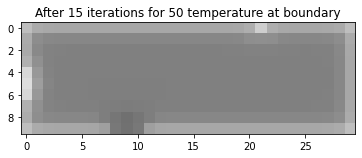

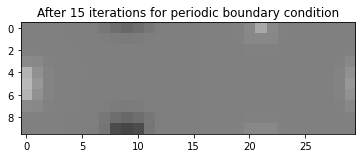

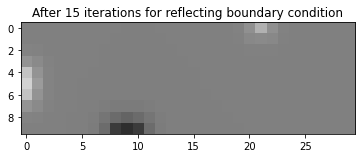

In [5]:
#Question 2
#Running this cell will create animation videos which can be watched after downloading 

t = 100
rodarr = [[[0 for k in range(n)] for j in range(m)] for i in range(t+1)]
#const boundary with 0 temprature
rodarr[0] = initBar(m,n,HotSites,ColdSites)
plt.imshow(rodarr[0],cmap='gray',vmin = COLD,vmax = HOT)
plt.title('Initial Rod')
plt.show()
for i in range(1,t+1):
    rodarr[i] = do_diffusion(rodarr[i-1],0.01,opt=2,val = 0)
plt.figure()
plt.imshow(rodarr[15],cmap='gray',vmin = COLD,vmax = HOT)
plt.title('After 15 iterations for 0 temperature at boundary')
plt.show()

animate_video(rodarr, 'Q2 Absorbing Boundary Temp=0.mp4')

#const boundary with 25 temprature
plt.figure()
rodarr[0] = initBar(m,n,HotSites,ColdSites)
for i in range(1,t+1):
    rodarr[i] = do_diffusion(rodarr[i-1],0.01,opt=2,val = 25)
plt.imshow(rodarr[15],cmap='gray',vmin = COLD,vmax = HOT)
plt.title('After 15 iterations for 25 temperature at boundary')
plt.show()


animate_video(rodarr, 'Q2 Absorbing Boundary Temp=25.mp4')

#const boundary with 50 temprature
plt.figure()
rodarr[0] = initBar(m,n,HotSites,ColdSites)
for i in range(1,t+1):
    rodarr[i] = do_diffusion(rodarr[i-1],0.01,opt=2,val = 50)
plt.imshow(rodarr[15],cmap='gray',vmin = COLD,vmax = HOT)
plt.title('After 15 iterations for 50 temperature at boundary')
plt.show()


animate_video(rodarr, 'Q2 Absorbing Boundary Temp=50.mp4')

#periodic case
plt.figure()
rodarr[0] = initBar(m,n,HotSites,ColdSites)
for i in range(1,t+1):
    rodarr[i] = do_diffusion(rodarr[i-1],0.01,opt=3)
plt.imshow(rodarr[15],cmap='gray',vmin = COLD,vmax = HOT)
plt.title('After 15 iterations for periodic boundary condition')
plt.show()


animate_video(rodarr, 'Q2 Periodic Boundary.mp4')

#reflecting case
plt.figure()
rodarr[0] = initBar(m,n,HotSites,ColdSites)
for i in range(1,t+1):
    rodarr[i] = do_diffusion(rodarr[i-1],0.01,opt=1)
plt.imshow(rodarr[15],cmap='gray',vmin = COLD,vmax = HOT)
plt.title('After 15 iterations for reflecting boundary condition')
plt.show()


animate_video(rodarr, 'Q2 Reflecting Boundary.mp4')

Equilibrium Time :  196


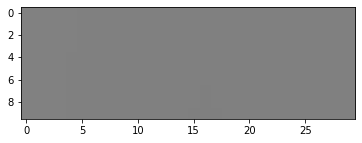

In [6]:
#Question 3
#Using the weighted sum method
rodarr = [[[0 for k in range(n)] for j in range(m)] for i in range(1)]
rodarr[0] = initBar(m,n,HotSites,ColdSites)
t = 1

while(1):
    tmparr = do_diffusion_q3(rodarr[t-1],opt = 1,val = 25)
    rodarr.append(tmparr)
    tmp = 0
    for i in range(len(rodarr[0])):
        for j in range(len(rodarr[0][0])):
            tmp = max(tmp, rodarr[t][i][j] - rodarr[t-1][i][j])
    if(tmp < 0.001):
        break
    t += 1

plt.imshow(rodarr[0],cmap = 'gray', vmin = COLD, vmax = HOT)
plt.figure();
plt.imshow(rodarr[t-1],cmap = 'gray', vmin = COLD, vmax = HOT)

animate_video(rodarr, 'Q3.mp4')

print('Equilibrium Time : ', t-1)


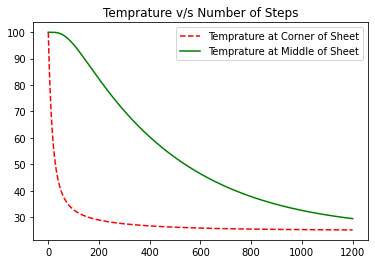

In [7]:
#Question 4(a)

HotSites_Q4 = []
ColdSites_Q4 = []

AMB = 100
t = 1200

rodarr = [[[0 for k in range(n)] for j in range(m)] for i in range(t+1)]
rodarr[0] = initBar(m,n,HotSites_Q4,ColdSites_Q4)

tmp_at_corner = [rodarr[0][0][0]]
tmp_at_middle = [rodarr[0][m//2][n//2]]
time = [0]

for i in range(1,t+1):
    rodarr[i] = do_diffusion(rodarr[i-1],0.01,opt = 2,val = 25)
    tmp_at_corner.append(rodarr[i][0][0])
    tmp_at_middle.append(rodarr[i][m//2][n//2])
    time.append(i)

plt.figure()
plt.plot(time,tmp_at_corner, 'r--', label = 'Temprature at Corner of Sheet')
plt.plot(time,tmp_at_middle, 'g-' , label = 'Temprature at Middle of Sheet')
plt.title('Temprature v/s Number of Steps')
plt.legend()

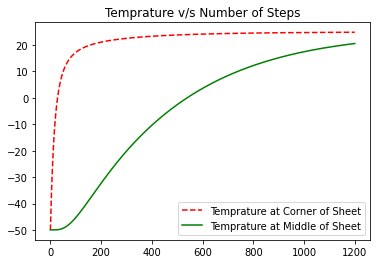

In [8]:
# Question 4(b)
AMB = -50
t = 1200

rodarr = [[[0 for k in range(n)] for j in range(m)] for i in range(t+1)]
rodarr[0] = initBar(m,n,HotSites_Q4,ColdSites_Q4)

tmp_at_corner = [rodarr[0][0][0]]
tmp_at_middle = [rodarr[0][m//2][n//2]]
time = [0]

for i in range(1,t+1):
    rodarr[i] = do_diffusion(rodarr[i-1],0.01,opt = 2,val = 25)
    tmp_at_corner.append(rodarr[i][0][0])
    tmp_at_middle.append(rodarr[i][m//2][n//2])
    time.append(i)

plt.figure()
plt.plot(time,tmp_at_corner, 'r--', label = 'Temprature at Corner of Sheet')
plt.plot(time,tmp_at_middle, 'g-' , label = 'Temprature at Middle of Sheet')
plt.title('Temprature v/s Number of Steps')
plt.legend()

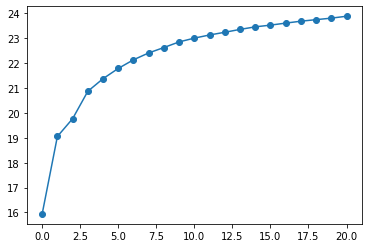

In [11]:
#Question 9
num_sim = 10
time_step = 20
AMB = 25
COLD = 0;
HOT = 50

import time
np.random.seed(int(time.time()))

temp_diff_time = []

for sim in range(num_sim):
    rod = initBar(m,n,HotSites,ColdSites)
    tmp = []
    for i in range(time_step+1):
        rod = do_diffusion_random(rod,0.10,1)
        tmp.append(rod[8][9])
    temp_diff_time.append(tmp)
    

mean_arr = np.mean(temp_diff_time,axis = 0)
time = np.arange(0,time_step+1)

plt.plot(time,mean_arr,marker = 'o')